# **NBA_Shot_Predictor_Notebook**
### **12/01/2022**

The research question is: **Can we accurately classify whether a shot taken in the NBA is successful or not, based on certain input features?**

## **Data Load and Preprocessing**

The data set is a csv file that contains details of basketball shots taken in the NBA in the 2014-15 season. This data set was found on __[Kaggle](https://www.kaggle.com/dansbecker/nba-shot-logs/version/1)__.

In [1]:
#Load the initial relevant packages.
#Numpy is used for mathematical functions, pandas is for data manipulation and analysis, whilst matplotlib and seaborn is for data visualisation.
#The inline command is a magic statement that shows and stores plot outputs in the notebook.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the data set and view the top five rows. 
all_data = pd.read_csv("shot_logs.csv")
all_data.head(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
#Use .info() to print a concise summary of the data set.
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

The original data dimensions are 128,069 observations and 21 features - n is much larger than p, meaning there should be no concern around the phenomena of "curse of dimensionality".  

The only missing data appears to be within the SHOT_CLOCK variable. On inspection of the data, many of these appear to be shots made when a team has received possession towards the end of the period, where there is less time remaining on the game clock than the default shot clock time of 24 seconds given when the team receives possession.

In [4]:
#Use .describe() to look at descriptive statistics of the data set.
all_data.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


The minimum TOUCH_TIME is negative, which does not make sense here and will need an adjustment. There are typically four periods in an NBA game, but this can be greater in the event of a tied game. This can be seen by the maximum value of 7 for the PERIOD variable. The SHOT_CLOCK variable maximum looks well behaved, as the maximum shot clock in the NBA is 24 seconds and there are no values that exceed this in the data set.

From closer inspection of the data set and cross-referencing it to individual games play-by-play, it appears that free throws are not included. This is preferable, as a free throw is a different type of shot and aspect of basketball. 

For the purpose of this assignment, certain variables will be removed. Some of these variables relate to individual players and further work could look at the player taking the shot, the defender nearest the player etc. However this is beyond the scope of this assignment.

In [5]:
#Drop certain variables and view the top five rows in this reduced data set.
reduced_data = all_data.drop(["GAME_ID","MATCHUP","W","FINAL_MARGIN",
                          "SHOT_NUMBER","SHOT_RESULT","CLOSEST_DEFENDER","CLOSEST_DEFENDER_PLAYER_ID",
                          "player_name","player_id", "PTS"],axis=1)
reduced_data.head(5)

,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM
0,A,1,01:09,10.8,2,1.9,7.7,2,1.3,1
1,A,1,00:14,3.4,0,0.8,28.2,3,6.1,0
2,A,1,00:00,NaN,3,2.7,10.1,2,0.9,0
3,A,2,11:47,10.3,2,1.9,17.2,2,3.4,0
4,A,2,10:34,10.9,2,2.7,3.7,2,1.1,0


The data set needs several adjustments: 
- LOCATION and PTS_TYPE are both binary variables and should be converted to 0/1 values.
- The GAME_CLOCK is a time variable. NBA basketball games are typically four periods of 12 minutes and the time is given as minutes and seconds remaining on the game clock. This variable is converted to total seconds remaining.
- The SHOT_CLOCK with missing values are given the time remaining as a value, if there is less than (or equal to) 24 seconds remaining. This is the "effective" shot clock as the player needs to make a shot before the period finishes. If there is more than 24 seconds, this is inaccurate and this variable is set to 24 seconds as the upper bound.  
- Negative TOUCH_TIME does not make sense and the assumption is this is a measurement error. Any observations with TOUCH_TIME less than or equal to 0 have been removed from the data set. 
- The PERIOD variable has been converted to dummy variables, as these are categorical (e.g. 1 for the first period) and not numerical variables. Only six columns will be used to avoid multicollinearity. This could occur if all seven periods are given an indicator column. 

In [6]:
#Map the binary variables of LOCATION (Home or Away) and PTS_TYPE (3 or 2 pointers) to 1 and 0 respectively.
#Change the time variable in GAME_CLOCK to a continuous variable that gives the seconds remaining.
#This uses a function that makes use of the split() function, which splits a string into a list. Int() converts this output to a numerical format.
#Fill in the missing variable for SHOT_CLOCK with the equivalent GAME_CLOCK time and scale down to 24 seconds, if greater.
#Remove the rows that have negative TOUCH_TIME as this does not make sense.
#Use pd.get_dummies() to convert PERIOD to dummay variables. One value is not used as a dummy variable, to avoid multicollinearity.

nba_shots = reduced_data

nba_shots["LOCATION"] = nba_shots["LOCATION"].map({"H":1,"A":0})
nba_shots["PTS_TYPE"] = nba_shots["PTS_TYPE"].map({3:1,2:0})

def get_sec(time_str):
    mins,secs = time_str.split(':')
    return int(mins)*60 + int(secs)

nba_shots["GAME_CLOCK"] = nba_shots["GAME_CLOCK"].apply(lambda x: get_sec(x))

nba_shots["SHOT_CLOCK"] = nba_shots["SHOT_CLOCK"].fillna(nba_shots["GAME_CLOCK"])
nba_shots.loc[nba_shots["SHOT_CLOCK"]>24, "SHOT_CLOCK"] = 24

nba_shots = nba_shots[nba_shots["TOUCH_TIME"]>0]

nba_shots = pd.get_dummies(nba_shots,columns=["PERIOD"], drop_first=True)

nba_shots.head()

,LOCATION,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PERIOD_2,PERIOD_3,PERIOD_4,PERIOD_5,PERIOD_6,PERIOD_7
0,0,69,10.8,2,1.9,7.7,0,1.3,1,0,0,0,0,0,0
1,0,14,3.4,0,0.8,28.2,1,6.1,0,0,0,0,0,0,0
2,0,0,0.0,3,2.7,10.1,0,0.9,0,0,0,0,0,0,0
3,0,707,10.3,2,1.9,17.2,0,3.4,0,1,0,0,0,0,0
4,0,634,10.9,2,2.7,3.7,0,1.1,0,1,0,0,0,0,0


In [7]:
nba_shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124711 entries, 0 to 128068
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LOCATION        124711 non-null  int64  
 1   GAME_CLOCK      124711 non-null  int64  
 2   SHOT_CLOCK      124711 non-null  float64
 3   DRIBBLES        124711 non-null  int64  
 4   TOUCH_TIME      124711 non-null  float64
 5   SHOT_DIST       124711 non-null  float64
 6   PTS_TYPE        124711 non-null  int64  
 7   CLOSE_DEF_DIST  124711 non-null  float64
 8   FGM             124711 non-null  int64  
 9   PERIOD_2        124711 non-null  uint8  
 10  PERIOD_3        124711 non-null  uint8  
 11  PERIOD_4        124711 non-null  uint8  
 12  PERIOD_5        124711 non-null  uint8  
 13  PERIOD_6        124711 non-null  uint8  
 14  PERIOD_7        124711 non-null  uint8  
dtypes: float64(4), int64(5), uint8(6)
memory usage: 10.2 MB


The removal of observations that have a TOUCH_TIME of less than or equal to zero has discarded 3,358 rows. 

In [8]:
nba_shots.describe()

,LOCATION,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PERIOD_2,PERIOD_3,PERIOD_4,PERIOD_5,PERIOD_6,PERIOD_7
count,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000
mean,0.499170,351.881101,12.286908,2.077716,2.846596,13.745229,0.269279,4.145443,0.451885,0.246594,0.251726,0.227326,0.007120,0.001323,0.000345
std,0.500001,207.544406,5.940889,3.508217,2.991336,8.848028,0.443587,2.742992,0.497682,0.431030,0.434006,0.419106,0.084082,0.036350,0.018566
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,173.000000,8.000000,0.000000,0.900000,4.900000,0.000000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,353.000000,12.100000,1.000000,1.700000,14.100000,0.000000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,532.000000,16.600000,3.000000,3.800000,22.600000,1.000000,5.300000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,720.000000,24.000000,32.000000,24.900000,47.200000,1.000000,53.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
nba_shots.nunique(axis=0)

LOCATION            2
GAME_CLOCK        719
SHOT_CLOCK        241
DRIBBLES           33
TOUCH_TIME        240
SHOT_DIST         445
PTS_TYPE            2
CLOSE_DEF_DIST    295
FGM                 2
PERIOD_2            2
PERIOD_3            2
PERIOD_4            2
PERIOD_5            2
PERIOD_6            2
PERIOD_7            2
dtype: int64

## **Exploratory Data Analysis**

<AxesSubplot:xlabel='GAME_CLOCK', ylabel='Density'>

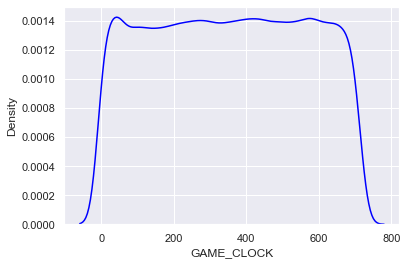

In [10]:
sns.set(style="darkgrid")
sns.kdeplot(nba_shots["GAME_CLOCK"], color="blue")

The distribution of time on the game clock suggests that shot frequency is reasonably uniform over a game. 

<AxesSubplot:xlabel='SHOT_DIST', ylabel='Density'>

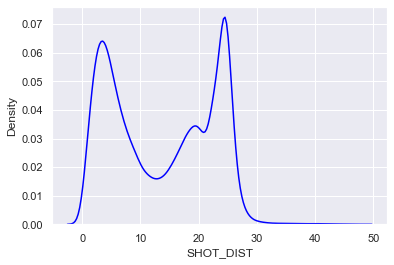

In [11]:
sns.kdeplot(nba_shots["SHOT_DIST"], color="blue")

The distribution of shot distance is bimodal. This makes sense as the 3pt line in basketball is between 22 and 23.75 feet away from the basket in the NBA. A higher peak around this distance makes sense as players going for a 3pt shot would like to minimise the distance, but not enough to make it a long 2pt shot.  

<AxesSubplot:xlabel='FGM', ylabel='count'>

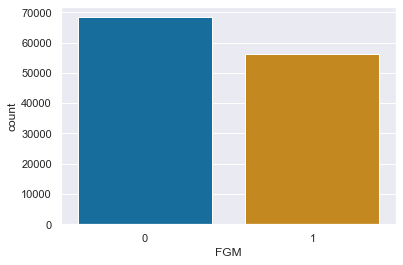

In [12]:
sns.countplot(x="FGM", data=nba_shots, palette="colorblind")

We have a reasonably balanced dataset here, with approximately 45% of shots made in the data set.

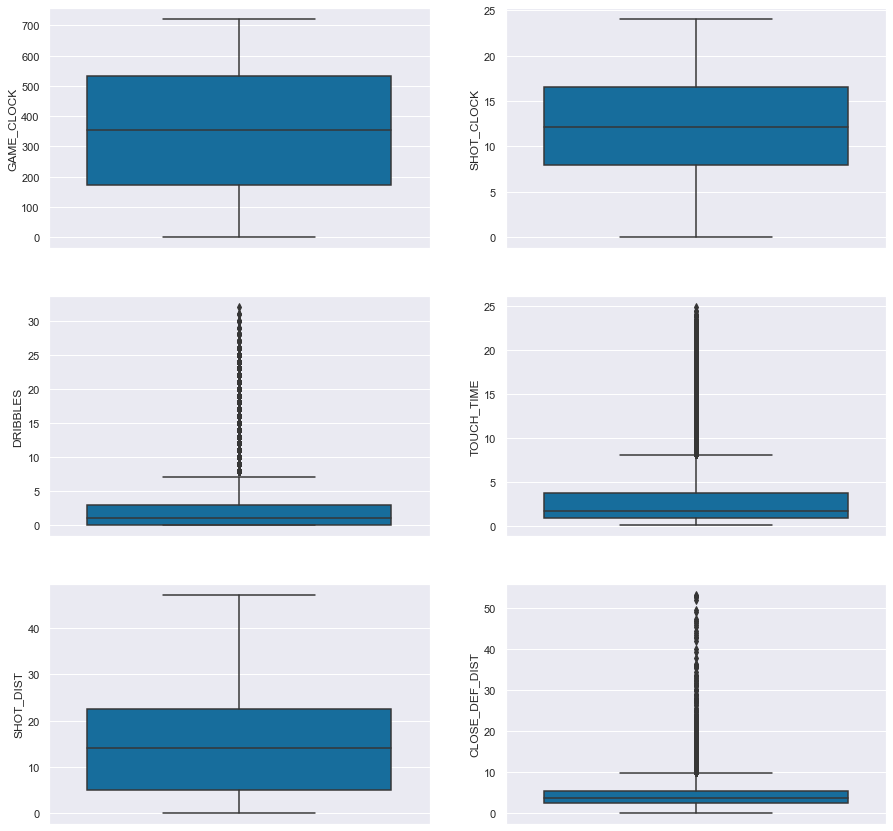

In [13]:
#Box plots for certain variables.
import math

boxplot_cols=["GAME_CLOCK","SHOT_CLOCK","DRIBBLES","TOUCH_TIME","SHOT_DIST","CLOSE_DEF_DIST"]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

count = 0
col_track = 1

for category in boxplot_cols:
    if col_track == 1:
        col_track = 0
    else:
        col_track = 1
    row_track = int(math.floor(count)/2)    
    sns.boxplot(data=nba_shots, y=category,  palette="colorblind", ax=axs[row_track, col_track])
    count += 1

plt.show()

There appears to be the presence of outliers for the variables DRIBBLES, TOUCH_TIME and CLOSE_DEF_DIST. Upon consideration, DRIBBLES and TOUCH_TIME will not be changed, but CLOSE_DEF_DIST will be winsorised at the upper bound. The rationale is that in basketball, having no player closer than 10-15 feet should, theoretically, not make much difference to being able to make that shot than having a player 50 feet away from you. This is because it is still a large amount of space, especailly for the highly skilled basketball players in the NBA.  

The winsorize() function, from the scipy package, is used on the CLOSE_DEF_DIST variable and it is only applied to the upper bound (any value at the top 2.5% of the distribution). Winsorisation is where, rather than removing the values that are above the 97.5 percenitle, they are changed to the value of the 97.5 percentile. 

In [14]:
from scipy.stats.mstats import winsorize

print(nba_shots["CLOSE_DEF_DIST"].quantile(0.975))

nba_shots["CLOSE_DEF_DIST"] = winsorize(nba_shots["CLOSE_DEF_DIST"],(0,0.025))

11.0


<AxesSubplot:ylabel='CLOSE_DEF_DIST'>

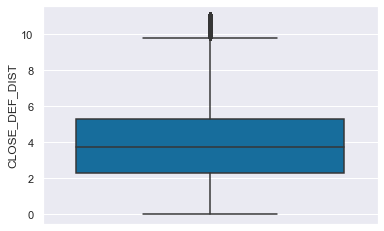

In [15]:
sns.boxplot(y="CLOSE_DEF_DIST",data=nba_shots, palette="colorblind")

The winsorisation has narrowed the range of distances now.

(6.5, -0.5)

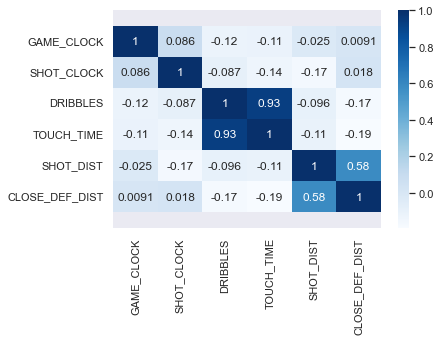

In [16]:
#The source of the correction for the formatting needed for this chart was found on:
#https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot.

corr_mx = nba_shots[boxplot_cols].corr()

ax = sns.heatmap(corr_mx, annot=True, cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

TOUCH_TIME and DRIBBLES are highly correlated inputs, so the presence of both is not needed in the model. Therefore, the DRIBBLES variable has been removed from the data set. This has been removed as it is a discrete variable, and has less variation in observations than TOUCH_TIME.

In [17]:
#Drop the DRIBBLES variable.
nba_shots = nba_shots.drop(["DRIBBLES"],axis=1)

<AxesSubplot:xlabel='FGM', ylabel='SHOT_DIST'>

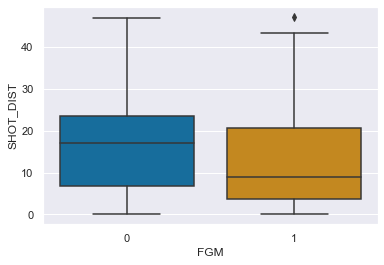

In [18]:
sns.boxplot(x="FGM",y="SHOT_DIST",data=nba_shots, palette="colorblind")

Shots that were successful have a distribution that is towards shorter distances than those that are not. This is an expected outcome as the closer a player is to the basket, the easier it is to make a successful shot (all else being equal).

<AxesSubplot:xlabel='FGM', ylabel='CLOSE_DEF_DIST'>

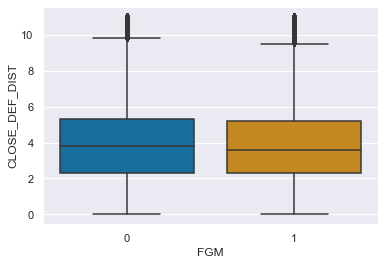

In [19]:
sns.boxplot(x="FGM",y="CLOSE_DEF_DIST",data=nba_shots,palette="colorblind")

The boxplots for whether a shot is successful or not appear very similar when plotted against the closest defender distance (after winsorisation).

<AxesSubplot:xlabel='FGM', ylabel='SHOT_CLOCK'>

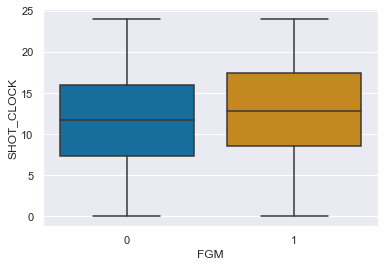

In [20]:
sns.boxplot(x="FGM",y="SHOT_CLOCK",data=nba_shots, palette="colorblind")

Successful shots have a higher median SHOT_CLOCK value. 

<AxesSubplot:xlabel='PTS_TYPE', ylabel='FGM'>

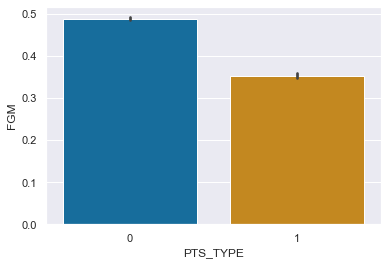

In [21]:
sns.barplot(x="PTS_TYPE", y="FGM", data=nba_shots, estimator=np.mean, palette="colorblind")

The above shows that the shots are more likely to be successful when they are 2pt attempts, rather than 3pt attempts. This difference in success ratio would be expected.

As a summary, the features that will be used in the model are:
- LOCATION: Whether the player who is shooting is home(1) or away(0). Binary variable. 
- GAME_CLOCK: Time remaining in the period, in seconds. Continuous variable. 
- SHOT_CLOCK: Time remaining on the shot clock, in seconds. Continuous variable.
- TOUCH_TIME: Time the player who takes the shot has had the ball, in seconds. Continuous variable.
- SHOT_DIST: The distance of the shot, in feet. Continuous variable. 
- PTS_TYPE: Whether the shot is a 2 pointer(0) or 3 pointer(1). Binary variable.  
- CLOSE_DEF_DIST: The closest defender to the player, in feet. Continous variable.
- PERIOD_x: Whether the shot was taken in that period of the game the shot is made in, with x representing the period number. Binary variable. 

The output label that the model will attempt to predict is:
- FGM: "Field goal made", which is whether the shot was successful(1) or not(0). Binary variable.

## **Logistic Regression**

As the model will be using regularisation (explained later), the variables in our dataset will be standardised. This is important because the regularisation uses Eucleadian norms, and could penalise the variables that are on a smaller scale, such as SHOT_CLOCK. 

The MinMaxScaler from scikit-learn will be used to process the data this way. This scales the variables so they are all on a scale between 0 and 1. Note that this does not affect binary variables (and so has not been applied to the output label). 

The MinMaxScaler applies the formula $\frac{X_i - X_{min}}{X_{max} - X_{min}}$ to the features. 

Source: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ 

In [22]:
#Import MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Drop the output labels and apply to the nba_shots data frame. 
#Reformat the data so it is in a Pandas data frame.
nba_shots_minmax = scaler.fit_transform(nba_shots.drop(["FGM"],axis=1))
nba_shots_minmax = pd.DataFrame(nba_shots_minmax, columns = nba_shots.drop(["FGM"],axis=1).columns)
nba_shots_minmax.head(5)

,LOCATION,GAME_CLOCK,SHOT_CLOCK,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,PERIOD_2,PERIOD_3,PERIOD_4,PERIOD_5,PERIOD_6,PERIOD_7
0,0.0,0.095833,0.450000,0.072581,0.163136,0.0,0.118182,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.019444,0.141667,0.028226,0.597458,1.0,0.554545,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.104839,0.213983,0.0,0.081818,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.981944,0.429167,0.072581,0.364407,0.0,0.309091,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.880556,0.454167,0.104839,0.078390,0.0,0.100000,1.0,0.0,0.0,0.0,0.0,0.0


The entire data set is split into training and test data sets. This is crucial to allow us to test the model on unseen data. 
The random_state parameter has been set to zero to allow for reproducibile output and an 80:20 split for training and test data seems appropriate for this task. 

In [23]:
#Import train_test_split() from sklearn. This allows us to easily split into data sets.
#As the original data set, there was considered no need to use  the stratify parameter within train_test_split().
#Set random_state to zero for reproducible data. 
from sklearn.model_selection import train_test_split

y = nba_shots["FGM"]
X = nba_shots_minmax

X_train_, X_test, y_train_, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

The training data set is further split into training and validation data sets. A validation data set will be used for tuning and selecting hyperparamters in the model. By using a 75:25 split here, it results in a 60:20:20 split of nba_shots.

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_,y_train_,test_size=0.25,random_state=0)

In [25]:
X_train_.shape, X_valid.shape, X_test.shape

((99768, 13), (24942, 13), (24943, 13))

Due to the large size of the dataset (there are over 24,000 observations in both the validation and test data sets and nearly 100,000 in the training data set), there is less of a need to use k-fold cross validation here.

The model that will be trained is a logistic regression (for binary classes). Despite the name, this model is used for classification problems and this is the type of problem here, as a label of 0 (shot missed) or 1 (shot made) is the output. Note that logistic regression can be used for multi-class problems but this is beyond the scope of the research question here. Chapter 4 of *The Elements of Statistical Learning* **(Hastie, T. et al., 2017)** states that logistic regression "models posterior probabilities of K classes via linear functions in x, while at the same time ensuring that they sum to one and remain in [0,1]." We can build on this definition below. 

The logistic regression makes use of the sigmoid function, which is $S(z) = \frac{1}{(1+e^{-z})}$. The model is linear as the input here, $z$, is of the form $wx^{T} + w^{0}$, where $w$ is a vector of weights, $w^{0}$ is a bias (or intercept) term, and $x^{T}$ are the features of an observation (transposed so the matrix multiplication works). The output of this sigmoid function is the probability of the observation having a positive label. 

The model uses the training data to learn these weights, which can then be applied to the test (unseen) data in order to calculate a probability that a shot is made or missed. 

The graph below shows that when $z$, or $wx^{T} + w^{0}$, is greater than 0, the output is greater than 0.5, so will predict a positive case (and the logic follows for values output values below 0.5). It also shows that the output is constrained between zero and one. This is what makes the logistic regression well suited to modelling probability of outcomes. 

Consider a simple example of whether a patient has a heart attack, or not, over the next year, where there is a two-dimensional observation,$x \in \mathbb{R}^2$, of BMI and hours of exercise per week. If the observation is $x^{T} = \begin{bmatrix}22\\16\end{bmatrix}$ and the weights are $w = \begin{bmatrix}2&-3\end{bmatrix}$ and $w^{0}= 1$, then as $z = wx^{T} + w^{0}$, $z = 2\cdot22 - 3\cdot16 + 1 = -3$. As  $\frac{1}{(1+e^{3})} = 0.047$, this equates the probability of a positive (a heart attack in the next year) to be less than 5%. This would be classified as negative, due to the probability being below 50%.   

Text(0, 0.5, 'S(z)')

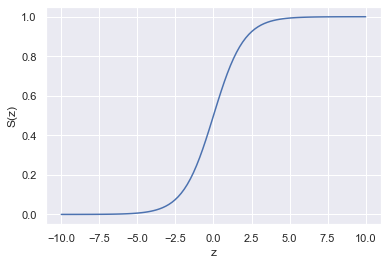

In [26]:
#Plot Sigmoid function to show shape. 
from scipy.special import expit

#The expit() function is the logistic sigmoid  for an array, which is between -10 and 10 here, with 100 intervals.  
z = np.linspace(-10, 10, 100)
S_z = expit(z)

#Plot the sigmoid function
sig_func_plot = sns.lineplot(x=z, y=S_z)
sig_func_plot.set_xlabel("z")
sig_func_plot.set_ylabel("S(z)")

The challenge is knowing what the weights should be in our logistic regression formula. There is no closed form solution to this model, so the weights are learned using iterative means. 

Gradient ascent is used on the likelihood function to find an optimum solution. With logistic regression, we are modelling the probability of the output label being a certain value, given a set of input features i.e. $P(Y=y|X=x)$, which is why we use the sigmoid function in the first place (as it constrains the output to between [0,1], which is needed for a probability). As stated before, the $P(Y=1|X=x) = S(x^{T} + w^{0}) = \frac{1}{(1+e^{-wx^{T} + w^{0}})}$.

One property of the sigmoid function is that $1-S(z) = S(-z)$. Therefore $P(Y=0|X=x) = S(-wx^{T} + w^{0}) = \frac{1}{(1+e^{wx^{T} + w^{0}})}$. This means we can generalise, so $P(Y=y|X=x) = S((2y-1)\cdot(wx^{T} + w^{0}))$. This works, because if $y=0$, the first bracket is $-1$ and if $y=1$, the first bracket is $1$. With this result, we can find the likelihood function, which is $l(w,w^0) = \prod_{i=1}^{n}S((2Y_i-1)\cdot(wX_i^{T} + w^{0}))$ and converted to log-likelihood (as a property of log functions is that products of terms within them are equivalent to the sums of the logs of the terms) as $log \space l(w,w^0) = \sum_{i=1}^{n}log S((2Y_i-1)\cdot(wX_i^{T} + w^{0}))$. 

The gradient ascent algorithm is where the derivative of the log-likelihood is found, with respect to both $w$ and $w^0$ weights (a vector and a scalar respectively), and added to the current weight values. It is also subject to a learning rate, which can influence how large these updates are. Therefore, the gradient ascent alogorithm is:

- $w \to w + \alpha \cdot \frac{\partial}{\partial w} log \space l(w,w^0)$
- $w_0 \to w_0 + \alpha \cdot \frac{\partial}{\partial w_0} log \space l(w,w^0)$

LogisticRegression() from the scikit-learn package will be used. There are various options for optimisation techniques that can be used with scikit-learn, and the solver that the model will be trained here is called "saga". This is a gradient optimisation method that is recommended for use in the scikit-learn documentation for larger datasets that have been appropriately scaled. More information can be found at https://arxiv.org/abs/1407.0202, but this is beyond the scope of the coursework. The default tol parameter is 0.0001, which means that the algorithm will stop running when the difference the update makes is smaller than this. The max_iter has also been set to 10,000 - this is more than the default of 100, in order to give the model more time to converge, if it needs it. 

Regularisation is a method that is implemented to avoid over-fitting to the training data. There are different types of regularisation that can be used with logistic regression. For the purposes of tuning the hyper-parameter in this assignment, both L1 and L2 norms will be used (but not the combination, which is also referred to as elastic-net). Euclidean norms are ways of measuring the length of a vector. The L1 norm is the sum of its elements, in absolute value, added together. For a d-dimensional vector $w$, the L1 norm, $\lVert w \rVert _1$, is $\lvert w_1 \rvert + ... + \lvert w_d \rvert$. The L2 norm is the sqaure root of the sum of its elements squared, which is denoted as $\lVert w \rVert _2$, is $\sqrt{w_1^{2} + ... + w_d^{2}}$. The square of the L2 norm, $\lVert w \rVert _2^{2}$, is used in regularisation.   

The regularisation term added is weighted by $\lambda$, with a larger $\lambda$ meaning a greater weight is given to the regularisation term. The LogisticRegression() classifier in scikit-learn uses a parameter C, which is the inverse of regularisation strength ($\lambda$), so a smaller value C is for greater regularisation strength. This regularisation term is added to the log-likelihood term, so it becomes $log \space l(w,w^0) = \sum_{i=1}^{n}log S((2Y_i-1)\cdot(wX_i^{T} + w^{0})) + \lambda \lVert w \rVert _1$ or $log \space l(w,w^0) = \sum_{i=1}^{n}log S((2Y_i-1)\cdot(wX_i^{T} + w^{0})) + \lambda \lVert w \rVert _2^{2}$, and the same method for gradient ascent, described above, applies. 

The accuracy score is one way of evaluating the model and is defined as the number of observations in the data set that are correctly classified divided by the total number of predictions. 

There are other metrics that can be considered. The F1 score is a commonly used metric and will be discussed here, along with precision and recall. 

Classification results on the test data can fall into four categories:
- True Positives (TP): A positive prediction for a true positive obervation. These are correctly classified shots made.
- False Positives (FP): A positive prediction for a true negative observation. These are incorrectly classified shots made.
- True Negatives (TN): A negative prediction for a true negative observation. These are correctly classified shots missed.
- False Negatives (FN): A negative prediction for a true positive observation. These are incorrectly classified shots missed.

The precision is $\frac{TP}{(TP+FP)}$. Precision is the ratio of true predicted positives amongst all predicited positives. This is the percentage of shots that were actually made, amongst those that were predicted to be made. 
The recall is $\frac{TP}{(TP+FN)}$. Recall is the ratio of true predicted positives amongst all true positives. This is the percentage of shots that were predicted to be made, amongst those that were actually made.
The F1 score uses a combination of precision and recall and is $\frac{2}{\frac{1}{recall} + \frac{1}{precision}}$. It is an average of precision and recall (but uses a harmonic mean). 

Accuracy is fine to use here as the data set is balanced (approximately 45% are positive cases of shots made), but precision, recall, and the F1 score will also be calculated for completeness. 

The hyperparameter in the regularisation ($\lambda$) is now tuned. This is done by setting different values of $\lambda$ when specifying the model, using the training data to learn, and then calculating the different scores using the validation data set. Additionally, the tuning here is going to look at both L1 and L2 regularisation methods and compare their metrics. 

Source used for information was https://towardsdatascience.com/the-art-of-hyperparameter-tuning-in-python-c581a129d4e4.

In [27]:
#Logistic Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

#Declare lists for different levels of lambda and different regularisation techniques.
lambda_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty_list = ["l1", "l2"]

#Declare empty lists to add in various results of the different trials. 
lambda_add=[]
penalty_add=[]
accuracy_results=[]
precision_results=[]
recall_results=[]
f1_results=[]

#Run a for loop to go through every possible combination of lambda and regularisation. 
for h_lambda in lambda_list:
    for h_penalty in penalty_list:
        
        #Train the model using given hyperparameter. 
        logreg_tune = LogisticRegression(penalty=h_penalty, random_state=0, 
                                         C=1/h_lambda, max_iter=10000, solver="saga").fit(X_train,y_train)
        #Calculate the predictions on the validation data. 
        logreg_tune_predict = logreg_tune.predict(X_valid)
        #Calculate accuracy, precision, recall, and F1 scores.
        logreg_tune_acc_score = logreg_tune.score(X_valid,y_valid)
        logreg_tune_pre_score = sklearn.metrics.precision_score(y_valid, logreg_tune_predict) 
        logreg_tune_rec_score = sklearn.metrics.recall_score(y_valid, logreg_tune_predict)
        logreg_tune_f1_score = sklearn.metrics.f1_score(y_valid, logreg_tune_predict)
            
        #Append the details and results of the trial into lists.
        lambda_add.append(h_lambda)
        penalty_add.append(h_penalty)
        accuracy_results.append(logreg_tune_acc_score)
        precision_results.append(logreg_tune_pre_score)        
        recall_results.append(logreg_tune_rec_score)
        f1_results.append(logreg_tune_f1_score)

#Create a data frame with all the results in. 
tuning_df = pd.DataFrame(list(zip(lambda_add, penalty_add, accuracy_results, 
                                  precision_results, recall_results, f1_results)),
                        columns=["Lambda","Penalty","Accuracy","Precision","Recall","F1"])
tuning_df

C:\Users\Harrison\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Lambda,Penalty,Accuracy,Precision,Recall,F1
0,0.001,l1,0.611900,0.596026,0.463843,0.521692
1,0.001,l2,0.611900,0.596026,0.463843,0.521692
2,0.010,l1,0.611900,0.596026,0.463843,0.521692
3,0.010,l2,0.611900,0.596026,0.463843,0.521692
4,0.100,l1,0.611900,0.596026,0.463843,0.521692
5,0.100,l2,0.612060,0.596295,0.463843,0.521795
6,1.000,l1,0.611739,0.595865,0.463404,0.521352
7,1.000,l2,0.611860,0.596154,0.463052,0.521240
8,10.000,l1,0.611298,0.595600,0.461471,0.520026
9,10.000,l2,0.611980,0.597571,0.458220,0.518699


Text(0.5, 0, 'λ')

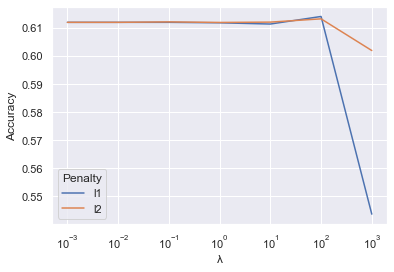

In [28]:
#Source for this amendment to a log scale was found on:
#https://stackoverflow.com/questions/64769205/seaborn-lineplot-logarithmic-scale

#Plot the accuracy scores.
acc_plot = sns.lineplot(data=tuning_df, x="Lambda", y="Accuracy", hue="Penalty")
acc_plot.set(xscale="log")
acc_plot.set_xlabel("λ")

Text(0.5, 0, 'λ')

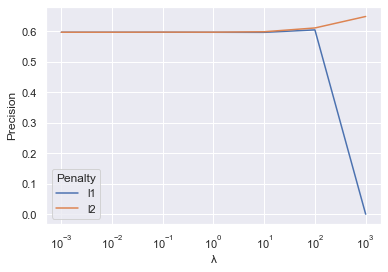

In [29]:
#Plot the precision scores.
pre_plot = sns.lineplot(data=tuning_df,x="Lambda", y="Precision", hue="Penalty")
pre_plot.set(xscale="log")
pre_plot.set_xlabel("λ")

Text(0.5, 0, 'λ')

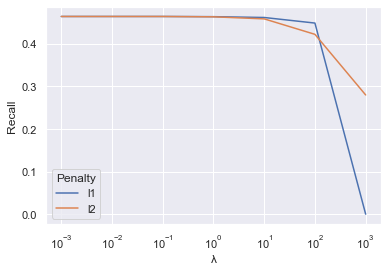

In [30]:
#Plot the recall scores.
rec_plot = sns.lineplot(data=tuning_df,x="Lambda", y="Recall", hue="Penalty")
rec_plot.set(xscale="log")
rec_plot.set_xlabel("λ")

Text(0.5, 0, 'λ')

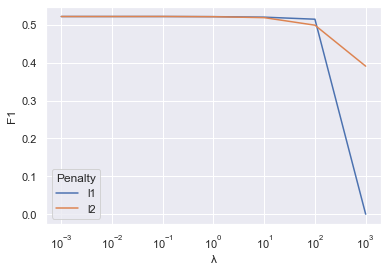

In [31]:
#Plot the F1 scores.
f1_plot = sns.lineplot(data=tuning_df,x="Lambda", y="F1", hue="Penalty")
f1_plot.set(xscale="log")
f1_plot.set_xlabel("λ")

When $\lambda$ is set to 1000, the precision, recall, and F1 score are undefined, as the model sets all of the output to zero. This can be an example of a "lazy" model and has also resulted in the lower accuracy score - approximately 54% accuracy can be obtained by just setting the label to the dominant class of shots missed. 

With the hyperparameter tuned, there is not a large variation among different choices. The model will use L1 norm regularisation and $\lambda$ set at 100. This gave the highest accuracy score and the L1 norm regularisation can set weights to zero for features, which will be interesting to inspect within the results. 

We train the model again below and then calculate the metric scores on the test data.

In [32]:
#Use selected hyperparamter to train final model.
logreg_model = LogisticRegression(penalty='l1', random_state=0, C=1/100, solver="saga").fit(X_train,y_train)

#Use test data to calculate metrics. 
logreg_model_predict = logreg_model.predict(X_test)
logreg_model_acc_score = logreg_model.score(X_test,y_test)

logreg_model_pre_score, = sklearn.metrics.precision_score(y_test, logreg_model_predict),
logreg_model_rec_score, = sklearn.metrics.recall_score(y_test, logreg_model_predict),
logreg_model_f1_score = sklearn.metrics.f1_score(y_test, logreg_model_predict)

print("Using the test data in the final trained model, the accuracy score is: %s, the precision score is: %s, the recall score is: %s, and the F1 score is: %s."
      %(round(logreg_model_acc_score,4), round(logreg_model_pre_score,4),
       round(logreg_model_rec_score,4), round(logreg_model_f1_score,4)))

Using the test data in the final trained model, the accuracy score is: 0.6172, the precision score is: 0.6005, the recall score is: 0.4573, and the F1 score is: 0.5192.


In [33]:
#Import confusion matrix and plot as data frame.
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, logreg_model_predict, labels = [1,0]), 
             index=["True Positive","True Negative"], columns=["Predicted Positive","Predicted Negative"])

,Predicted Positive,Predicted Negative
True Positive,5156,6119
True Negative,3430,10238


This is a confusion matrix, which is a nice visualisation of the test data classifications. It can also be used to calculate and check precision, recall, and F1 score values. For example, precision is $\frac{TP}{(TP+FP)} = \frac{5156}{5156+3430} = 0.6005$.

In [34]:
#Create a data frame for the model coefficients and label with the feature they represent.
logreg_model.intercept_, pd.DataFrame(logreg_model.coef_,
             columns=X_train.columns)

(array([0.011817]),
    LOCATION  GAME_CLOCK  SHOT_CLOCK  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
 0       0.0         0.0    0.366555    -0.44926  -2.610089       0.0   
 
    CLOSE_DEF_DIST  PERIOD_2  PERIOD_3  PERIOD_4  PERIOD_5  PERIOD_6  PERIOD_7  
 0        1.092425       0.0       0.0       0.0       0.0       0.0       0.0  )

As L1 regularisation was used, this has returned a sparse solution, where only weights have been given to SHOT_CLOCK, TOUCH_TIME, SHOT_DIST, and CLOSE_DEF_DIST. The signs of these coefficients for SHOT_DIST and CLOSE_DEF_DIST are not suprising (negative for shot distance as a greater distance reduces the probability of making a shot and positive for closest defender distance as when defenders are further away, this means less pressure on the shooter, so all else being equal, increases the probability of the shot being made). SHOT_CLOCK has a positive weight, meaning a greater probability of making a shot, all else being equal, if there is more time remaining on the shot clock. TOUCH_TIME has a negative coefficient, so the model is suggesting that when players have possession of the ball for longer, their probability of making the shot reduces, all else being equal. 

Sources used for information were: https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1 & https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html.

The final result of the model is underwhelming, as 61.72% accuracy is not reliable enough in my opinion. It does outperform a "lazy" model, which would correctly classify around 55% of data, so whilst there is some gain, it does show the data that was used does not have high amounts of predictive power. Interestingly, the precision score was higher than recall for our model. 

As mentioned previously, further work could incorporate individual skill (which players are taking or defending the shot) into the model in an attempt to improve accuracy.